<a href="https://www.kaggle.com/code/cagkangrsy/customer-segmentation-with-rfm-analysis?scriptVersionId=109847970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation with RFM Analysis

### Business Problem 
FLO, an online shoe store, wants to divide their customers into segments and to determine marketing strategies according to these segments. For this need, the behaviours of the customers are going to be defined and the customers will be grouped by this common behaviour.

### Dataset Summary
The dataset consists of information obtained from the past shopping behavior of customers who made their last purchase as Omnichannel (both online and offline purchases) from FLO in 2020 - 2021.

**master_id:** Unique customer number.  
**order_channel:** The channel that the purchase was made. (Android, iOS, Desktop, Mobile)  
**last_order_channel:** The channel that the  last purchase was made.  
**first_order_date :** First purchase date of the customer.  
**last_order_date:** Last purchase date of the customer.  
**last_order_date_online:** Last online purchase date of the customer.  
**last_order_date_offline:** Last offline purchase date of the customer.  
**order_num_total_ever_online:** Total online purchase count of the customer.  
**order_num_total_ever_offline:** Total offline purchase count of the customer.  
**customer_value_total_ever_offline:** Total value spent on offline purchases by the customer.  
**customer_value_total_ever_online:** Total value spent on online purchases by the customer.  
**interested_in_categories_12:** The categories that customer purchased from in the last 12 months. 


In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None) # Can be uncommented to see all dataset in one print
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width',125)


In [2]:

df_ = pd.read_csv("../input/flo-data-20k/flo_data_20k.csv")
df = df_.copy()


In [3]:
# A function is written to examine the general shape of the dataset
def general_info (dataframe):
    print("--- Head --- ")
    print(dataframe.head(10))
    print("--- Variables ---")
    print(dataframe.columns)
    print("--- Statistics ---")
    print(dataframe.describe().T)
    print("--- Null Value ---")
    print(dataframe.isnull().sum())
    print("--- Variable Types ---")
    print(dataframe.info())
    
general_info(df)

--- Head --- 
                              master_id order_channel last_order_channel first_order_date last_order_date  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07   
5  e585280e-aae1-11e9-a2fc-000d3a38a36f       Desktop            Offline       2018-11-18      2021-03-13   
6  c445e4ee-6242-11ea-9d1a-000d3a38a36f   Android App        Android App       2020-03-04      2020-10-18   
7  3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f        Mobile            Offline       2020-05-15      2020-08-12   
8  cf

In [4]:
# In order to use in the RFM analysis total order counts and total spendings are calculated
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


In [5]:
# The data types of the date variables are changed with datetime module to be able to use them in date calculations.
date_columns = df.columns[df.columns.str.contains("date")]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
df.dtypes


master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
order_num_total                             float64
customer_value_total                        float64
dtype: object

In [6]:
# We can analyse the data by order channel info, 5 most spending customers,5 customers with most purchases.
df.groupby("order_channel").agg({"master_id": "nunique",
                             "order_num_total": "sum",
                             "customer_value_total": "sum"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


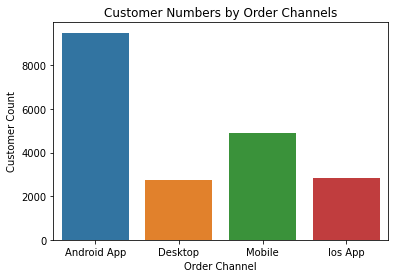

In [7]:
# Graphic of order channel distribution is drawn.
sns.countplot(data=df,x="order_channel")
plt.title("Customer Numbers by Order Channels")
plt.xlabel("Order Channel")
plt.ylabel("Customer Count")
plt.show()

In [8]:
df.sort_values(by = "customer_value_total",ascending=False).head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34


In [9]:
df.sort_values(by = "order_num_total",ascending=False).head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36


In [10]:
# For the RFM analysis we have to choose a analysis date, The date 2 days after the last purchase is selected.
print(df["last_order_date"].max())
today_date = dt.datetime(2021,6,1)


2021-05-30 00:00:00


In [11]:
# For the RFM analysis, Recency, Frequency and Monetary metrics are calculated and stored in to a dataframe.
rfm = pd.DataFrame()
rfm["master_id"] = df["master_id"]
rfm["recency"] = (today_date - df["last_order_date"]).astype('timedelta64[D]')
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98


In [12]:
# The RFM metrics are now turned into RFM scores to normalize them in order to be capable of making a comparison.
# R score
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])

# F score : the rank method is used because there or too many duplicate values that qcut can not decide to put them in which category
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])

# M score
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

#RF score
rfm["RF_SCORE"] = rfm["recency_score"].astype("str") + rfm["frequency_score"].astype("str")

#RFM score
rfm["RFM_SCORE"] = rfm["recency_score"].astype("str") + rfm["frequency_score"].astype("str") + rfm["monetary_score"].astype("str")

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31,311



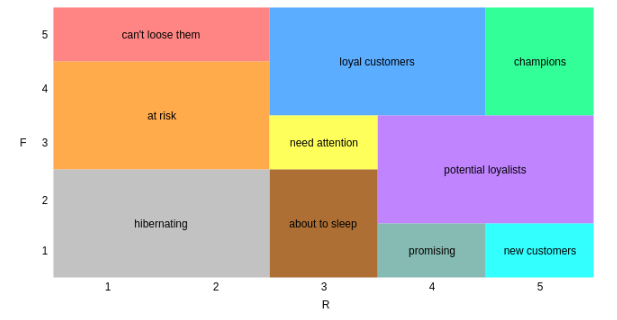!

In [13]:
# With the help of RF score every customer is segmentized by using Regex. The segments are obtained from the above source.
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.reset_index(inplace=True)

rfm.head()

,index,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE,segment
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34,344,loyal_customers
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35,355,loyal_customers
2,2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24,243,at_Risk
3,3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31,311,about_to_sleep
4,4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31,311,about_to_sleep


In [14]:
# Segments are presented by their recency, frequency, monetary metrics with their min, max and mean values.
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg({"count","min","mean","max"})

recency                      frequency                   monetary                        
                      count    max    min   mean     count    max  min  mean    count      max    min    mean
segment                                                                                                      
about_to_sleep         1629 145.00  84.00 113.79      1629   3.00 2.00  2.40     1629  1607.45  49.98  359.01
at_Risk                3131 367.00 146.00 241.61      3131   7.00 3.00  4.47     3131  3615.67  80.97  646.61
cant_loose             1200 367.00 146.00 235.44      1200 111.00 7.00 10.70     1200 12103.15 274.42 1474.47
champions              1932  33.00   2.00  17.11      1932 202.00 4.00  8.93     1932 45905.10 250.34 1406.63
hibernating            3604 367.00 146.00 247.95      3604   3.00 2.00  2.39     3604  2533.04  44.98  366.27
loyal_customers        3361 145.00  34.00  82.59      3361  83.00 4.00  8.37     3361 36818.29 183.12 1216.82
need_attention          823 145.00  84.00 113.83       823   4.00 3.00  3.73      823  4361.44  80.86  562.14
new_customers           680  33.00   2.00  17.92       680   2.00 2.00  2.00      680  1725.38  69.98  339.96
potential_loyalists    2938  83.00   2.00  37.16      2938   4.00 2.00  3.30     2938 20706.34  65.91  533.18
promising               647  83.00  34.00  58.92       647   2.00 2.00  2.00      647  1671.75  44.98  335.67

<AxesSubplot:title={'center':'Monetary Metric Means in Segments'}, xlabel='monetary', ylabel='segment'>

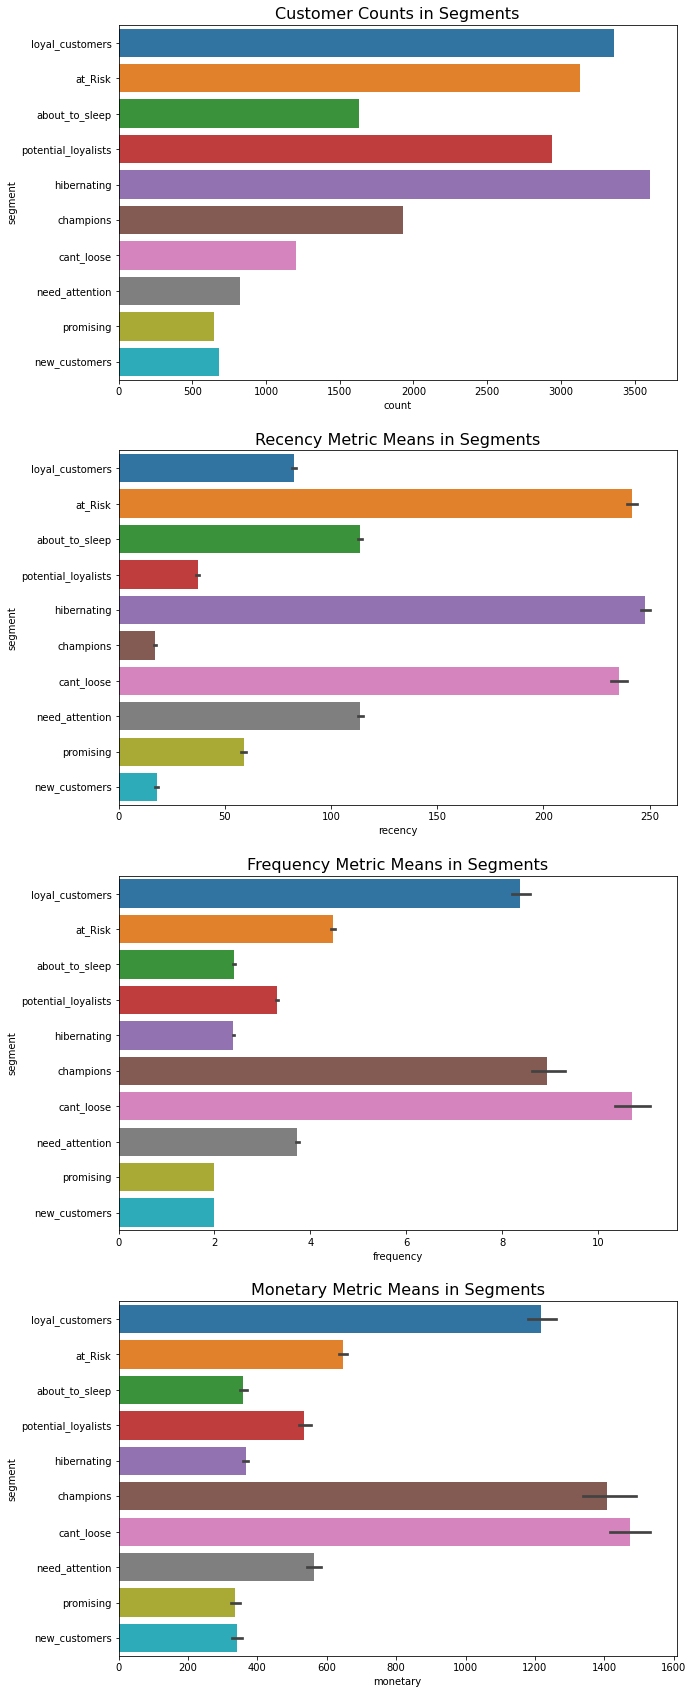

In [15]:
# Customer counts in segments and recency, frequency, monetary metrics of segments are presented in graphics.
fig, axes = plt.subplots(4,1,figsize=(10, 30))
axes[0].set_title("Customer Counts in Segments", fontsize = 16)
axes[1].set_title("Recency Metric Means in Segments", fontsize = 16)
axes[2].set_title("Frequency Metric Means in Segments", fontsize = 16)
axes[3].set_title("Monetary Metric Means in Segments", fontsize = 16)
sns.countplot(ax=axes[0], y="segment", data=rfm)
sns.barplot(ax=axes[1] ,y = "segment", x = "recency", data = rfm)
sns.barplot(ax=axes[2], y = "segment", x = "frequency", data = rfm)
sns.barplot(ax=axes[3], y = "segment", x = "monetary", data = rfm)

**An example use of this analysis can be like this:** FLO is adding a new women's shoe brand. Product prices of the new brand are higher than general customer preferences. For this reason, it is aimed to contact with customer profiles which will be interested
in the new brand sales and promotions. The customers that will be reached specially are loyal customers (champions, loyal_customers) who make purchases from women's category. The results will be saved in a
csv file.

In [16]:
target_cust_w = df[df["interested_in_categories_12"].str.contains("KADIN")]["master_id"]
w_customer_ids = rfm[(rfm["master_id"].isin(target_cust_w)) & (rfm["segment"].isin(["champions", "loyal_customers"]))]["master_id"]
w_customer_ids.to_csv("yeni_marka_kadin_musteri.csv", index=False)

w_customer_ids

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: master_id, Length: 2497, dtype: object

**Example 2:** A discount of approximately 40% is planned to be implemented on Men's and Children's wear. The intended customer audience who has interest in this discount are previous good customers that didn't make any purchases in a long time and new customers. The customer ids of the suitable customers will be saved in a csv  file.


In [17]:
target_cust_mc = df[(df["interested_in_categories_12"].str.contains("ERKEK")) | (df["interested_in_categories_12"].str.contains("COCUK"))]["master_id"]
mc_customer_ids = rfm[(rfm["master_id"].isin(target_cust_mc)) & (rfm["segment"].isin(["cant_loose", "hibernating", "new_customers"]))]["master_id"]
mc_customer_ids.to_csv("erkek_ve_cocuk_indirim_musteri.csv", index=False)

mc_customer_ids

7        3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10       ae608ece-c9d8-11ea-a31e-000d3a38a36f
15       13ed97a4-b167-11e9-89fa-000d3a38a36f
19       2730793e-3908-11ea-85d6-000d3a38a36f
21       7b289956-d691-11e9-93bc-000d3a38a36f
                         ...                 
19910    7ab86f3e-b244-11ea-b736-000d3a38a36f
19928    8ef8cfc4-606f-11ea-8dd8-000d3a38a36f
19932    13a5e98c-a824-11e9-a2fc-000d3a38a36f
19933    6d285c64-5e73-11ea-be5b-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
Name: master_id, Length: 2771, dtype: object

### Insights
It can be seen that expected values are obtained. For example, the recency mean values are very low in champion and new 
customers since they should have made their purchases very recently unlike at_risk and hibernating customers which are losing
the connection with the company. When frequency is examined we can see that champion customers has high mean values while new 
customers has lower values which makes them two distinct classes with similar recency values. I think this is very crucial to 
be aware of. On the other hand, monetary metrics is rather more insignificant compared to others. As it can be observed;
about_to_sleep, hibernating, new_customers, promising segments have similar monetary mean values but they have very different
behaviours when compared. According to these comparisons on the data, companies or departments can develop strategies on the
targeted segments optimally with their resources.